Get data from 'highquality_final_merged.csv'
Adding 'Rating-Category' column

Do linear regresson and decision tree

Compare their MSE and R2

Then, we got that the MSE and R2 of linear regresson is better then dicision tree

In [1]:
import pandas as pd
hq_df = pd.read_csv('highquality_final_merged.csv')

In [2]:
# Import all modules needed
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Make Rating Category

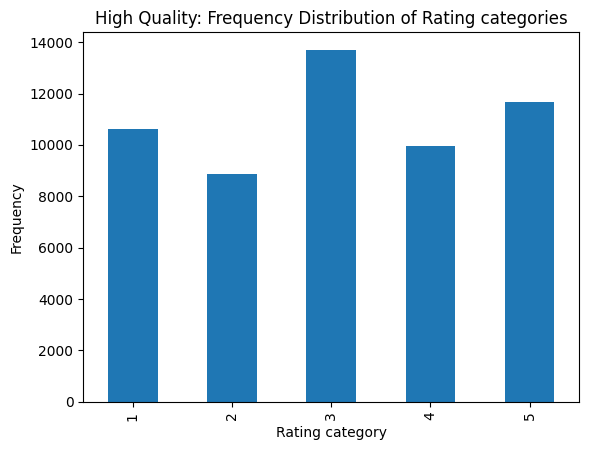

In [3]:
# Categorize rating for high quality
hq_df['Rating-Category'] = pd.cut(hq_df['Book-Rating'], 
                                    bins=[0, 6, 7, 8, 9,10], 
                                    labels=[1, 2, 3, 4, 5], 
                                    right=True)
rating_counts = hq_df['Rating-Category'].value_counts().sort_index()
rating_counts.plot(kind='bar')

# Set plot title and labels
plt.title('High Quality: Frequency Distribution of Rating categories')
plt.xlabel('Rating category')
plt.ylabel('Frequency')

# Display the plot
plt.show()

In [4]:
# Regresson for high quality
x = hq_df.drop(columns=['User-ID', 'ISBN', 'Book-Rating', 'Rating-Category', 
                        'Book-Title', 'Book-Author', 'Book-Publisher', 
                        'Year-Of-Publication-Bin', 'Filtered-Title', 
                        'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = hq_df['Book-Rating']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Compute MSE and R2 of linear regresson
linear_reg= LinearRegression()
linear_scores = cross_val_score(linear_reg, x, y, cv= 5, scoring= 'neg_mean_squared_error')
linear_r2_scores = cross_val_score(linear_reg, x ,y, cv=5, scoring = 'r2')
linear_rmse_scores= (-linear_scores)**0.5

print('Linear Regression Cross-Validation RMSE Scores:')
print(linear_rmse_scores)
print('Linear Regression Mean RMSE:', linear_rmse_scores.mean())
print()
print('Linear Regression Cross-Validation R^2 Scores:')
print(linear_r2_scores)
print('Linear Regression Mean R^2:', linear_r2_scores.mean())

Linear Regression Cross-Validation RMSE Scores:
[1.68216346 1.67067188 1.71784519 1.79458552 1.76555659]
Linear Regression Mean RMSE: 1.7261645259909888

Linear Regression Cross-Validation R^2 Scores:
[-0.01294974  0.02410744  0.02383541  0.01036782  0.01474836]
Linear Regression Mean R^2: 0.012021857230095568


In [5]:
# Initialize Decision Tree Regression model
dt_reg= DecisionTreeRegressor(random_state=42)

# Cross-validation for Decision Tree Regression
dt_scores = cross_val_score(dt_reg, x, y, cv=5,scoring='neg_mean_squared_error')
dt_r2_scores =cross_val_score(dt_reg, x, y, cv=5,scoring='r2')
dt_rmse_scores =(-dt_scores)**0.5
print('Decision Tree Regression Cross-Validation RMsE Scores:')
print(dt_rmse_scores)
print('Decision Tree Regression Mean RMSE:', dt_rmse_scores.mean())
print()
print('Decision Tree Regression Cross-Validation R^2 Scores:')
print(dt_r2_scores)
print('Decision Tree Regression Mean R^2:', dt_r2_scores.mean())

Decision Tree Regression Cross-Validation RMsE Scores:
[2.42602256 2.47514162 2.45216561 2.52241743 2.44697908]
Decision Tree Regression Mean RMSE: 2.464545258937528

Decision Tree Regression Cross-Validation R^2 Scores:
[-1.1068867  -1.14200159 -0.98909074 -0.95514697 -0.89253708]
Decision Tree Regression Mean R^2: -1.0171326144037127


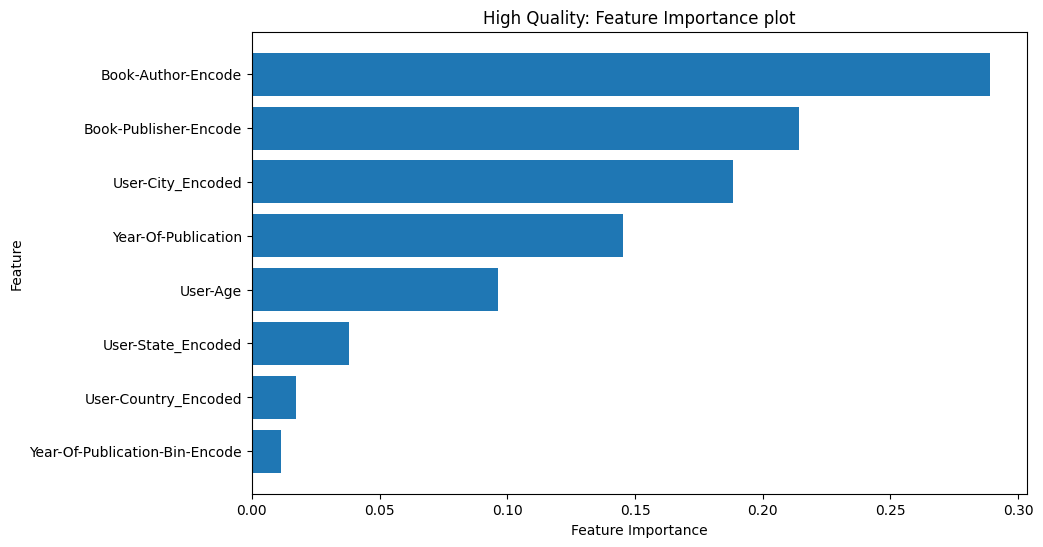

In [6]:
# Plot the feature importance of high quality
dt_reg.fit(x, y)
feature_importances = dt_reg.feature_importances_
feature_names =x.columns
sorted_idx= np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('High Quality: Feature Importance plot')
plt.show()

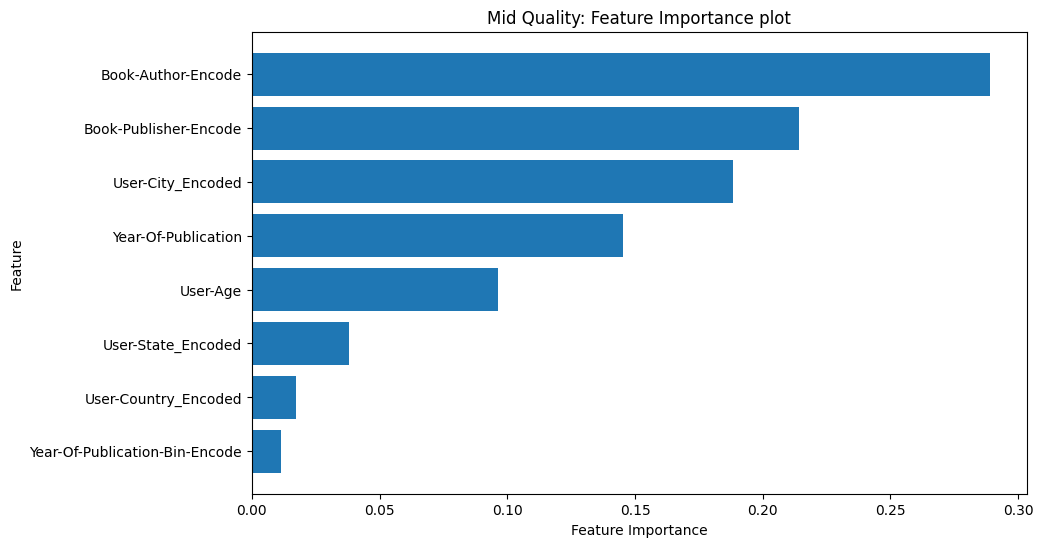

In [7]:
# Plot the feature importance of high quality
dt_reg.fit(x, y)
feature_importances = dt_reg.feature_importances_
feature_names =x.columns
sorted_idx= np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Mid Quality: Feature Importance plot')
plt.show()

Change to Classfication

Decision Tree Classifier Metrics:
Accuracy:0.1856
F1-score:0.1814
classification Report:
              precision    recall  f1-score   support

           1       0.43      0.44      0.43      2123
           2       0.23      0.23      0.23      1789
           3       0.35      0.34      0.34      2809
           4       0.28      0.27      0.27      1985
           5       0.48      0.49      0.49      2257

    accuracy                           0.36     10963
   macro avg       0.35      0.35      0.35     10963
weighted avg       0.36      0.36      0.36     10963




KNN Classifier Metrics:
Accuracy: 0.2125
F1-score:0.2041
classification Report:
              precision    recall  f1-score   support

           1       0.31      0.38      0.34      2123
           2       0.21      0.21      0.21      1789
           3       0.31      0.34      0.33      2809
           4       0.27      0.21      0.23      1985
           5       0.39      0.33      0.36      2257

    accuracy 

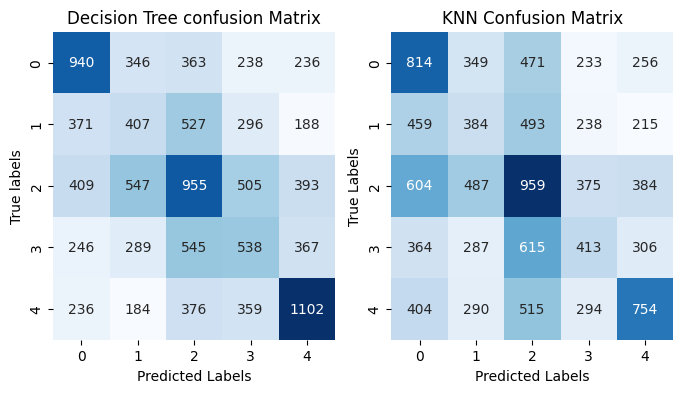

In [8]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
x = hq_df.drop(columns=['User-ID', 'ISBN', 'Book-Rating', 'Rating-Category', 
                        'Book-Title', 'Book-Author', 'Book-Publisher', 
                        'Year-Of-Publication-Bin', 'Filtered-Title', 
                        'User-City', 'User-State', 'User-Country', 'User-Age-Bin'])
y = hq_df['Rating-Category']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

#Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

#Cross-validation for Decision Tree Classifier
dt_accuracy =cross_val_score(dt_classifier, x, y, cv=5, scoring='accuracy')
dt_f1 =cross_val_score(dt_classifier, x, y, cv=5, scoring='f1_macro')

# Train Decision Tree Classifier
dt_classifier.fit(x_train, y_train)
dt_predictions =dt_classifier.predict(x_test)

# Compute Decision Tree Classifier metrics
dt_confusion_matrix = confusion_matrix(y_test, dt_predictions)
dt_classification_report = classification_report(y_test, dt_predictions)

# Initialize KNN Classifier
knn_classifier = KNeighborsClassifier()

#Cross-validation for KNN Classifier
knn_accuracy = cross_val_score(knn_classifier, x, y, cv=5, scoring='accuracy')
knn_f1 = cross_val_score(knn_classifier, x, y, cv=5, scoring='f1_macro')

# Train KNN Classifier
knn_classifier.fit(x_train,y_train)
knn_predictions =knn_classifier.predict(x_test)

# Compute KNN Classifier metrics
knn_confusion_matrix= confusion_matrix(y_test, knn_predictions)
knn_classification_report = classification_report(y_test, knn_predictions)


# Print results
print('Decision Tree Classifier Metrics:')
print(f'Accuracy:{np.mean(dt_accuracy):.4f}')
print(f'F1-score:{np.mean(dt_f1):.4f}')
print('classification Report:')
print(dt_classification_report)

print('\n\n')

print('KNN Classifier Metrics:')
print(f'Accuracy: {np.mean(knn_accuracy):.4f}')
print(f'F1-score:{np.mean(knn_f1):.4f}')
print('classification Report:')
print(knn_classification_report)



plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
sns.heatmap(dt_confusion_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Decision Tree confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True labels")

plt.subplot(1, 2, 2)
sns.heatmap(knn_confusion_matrix,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

plt.show()

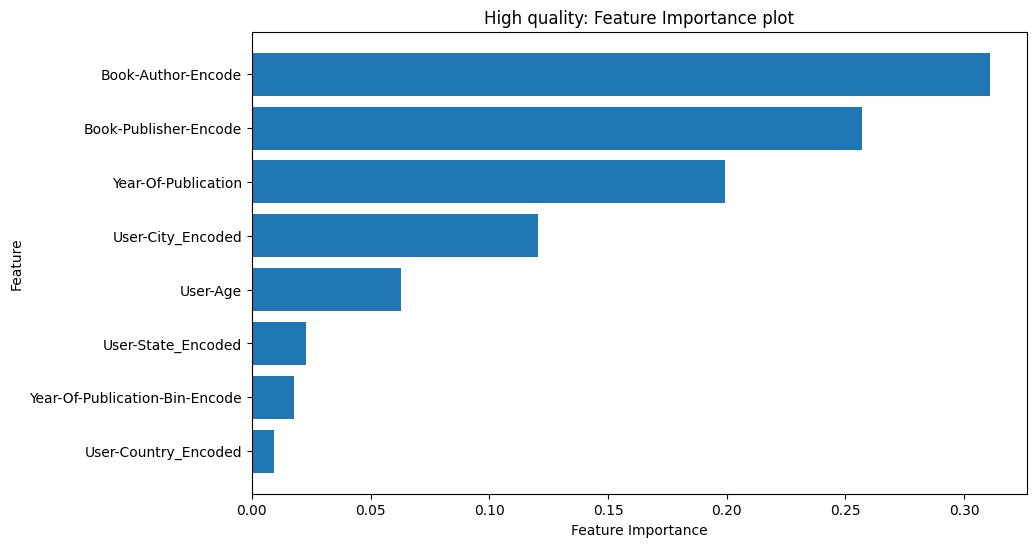

In [9]:
dt_classifier.fit(x,y)
feature_importances =dt_classifier.feature_importances_
feature_names =x.columns
sorted_idx=np.argsort(feature_importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('High quality: Feature Importance plot')
plt.show()